**Data Preparation**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
df_order = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/orders_dataset.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/customers_dataset.csv')
df_payment = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/order_payments_dataset.csv')
df_order_item = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/olist_order_items_dataset.csv')
df_product = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/olist_products_dataset.csv')
df_product_english_name = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/olist_product_category_english_name.csv')
df_review = pd.read_csv('/content/drive/MyDrive/dataset/Olist_dataset/olist_order_reviews_dataset.csv')

In [4]:
# checking order dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# checking customer dataset
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# checking payment dataset
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,13.0,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.9,18.14


In [8]:
df_product.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
df_product_english_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health beauty
1,informatica_acessorios,computers accessories
2,automotivo,auto
3,cama_mesa_banho,bed bath table
4,moveis_decoracao,furniture decor


In [10]:
df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Data Cleaning**

Let's start to check the missing values on the datasets

In [11]:
print(df_order.info(), '\n')
print(df_customer.info(), '\n')
print(df_payment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 no

In [12]:
df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
col_order = df_order.columns.to_list()
col_null = col_order[4:7]
print("Identify missing value in df_order")
print("There are", len(df_order[df_order[col_null].isnull().sum(axis=1) > 0]["order_status"]), "rows of missing values")
print(df_order[df_order[col_null].isnull().sum(axis=1) > 0]["order_status"].value_counts())
print("\nIdentify the non-missing value in df_order")
print(df_order[df_order[col_null].isnull().sum(axis=1) == 0]["order_status"].value_counts())

Identify missing value in df_order
There are 2980 rows of missing values
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

Identify the non-missing value in df_order
delivered    96455
canceled         6
Name: order_status, dtype: int64


From the result above, we know the missing values are canceled orders. 

Therefore, we decided to remove 2980 rows of missing values and 6 rows of canceled of non-missing values. 

In [14]:
df_order.dropna(axis=0, inplace=True)
idx_drop = df_order[df_order['order_status']=='canceled'].index.to_list()
df_order.drop(index=idx_drop, inplace=True)
print(df_order.info(), "\n")
print(df_order['order_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96455 non-null  object
 1   customer_id                    96455 non-null  object
 2   order_status                   96455 non-null  object
 3   order_purchase_timestamp       96455 non-null  object
 4   order_approved_at              96455 non-null  object
 5   order_delivered_carrier_date   96455 non-null  object
 6   order_delivered_customer_date  96455 non-null  object
 7   order_estimated_delivery_date  96455 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB
None 

delivered    96455
Name: order_status, dtype: int64


**Check Duplicate (The ID must be unique)**

There will be duplicate data on order_id

In [15]:
print("Duplicated order data = ", df_order.duplicated().sum())
print("Duplicated customer data = ", df_customer.duplicated().sum())
print("Duplicated payment data = ", df_payment.duplicated().sum())

Duplicated order data =  0
Duplicated customer data =  0
Duplicated payment data =  0


In [16]:
print("Duplicated order_id in order data = ", df_order['order_id'].duplicated().sum())
print("Duplicated customer_id in customer data = ", df_customer['customer_id'].duplicated().sum())
print("Duplicated order_id in payment data = ", df_payment['order_id'].duplicated().sum())

Duplicated order_id in order data =  0
Duplicated customer_id in customer data =  0
Duplicated order_id in payment data =  4446


In [17]:
df_payment[df_payment['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [18]:
df_dummy = pd.get_dummies(df_payment, columns=['payment_type'], prefix=['payment_type'])
df_dummy.drop(columns=['payment_type_not_defined'], inplace=True)

df_payment_1 = df_dummy.groupby(['order_id']).sum()
df_payment_1.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
df_payment_1 = df_payment_1.reset_index()
df_payment_1

,order_id,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,0,1,0,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,0,1,0,0
2,000229ec398224ef6ca0657da4fc703e,216.87,0,1,0,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,0,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,0,1,0,0
...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,1,0,0,0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,1,0,0,0
99437,fffce4705a9662cd70adb13d4a31832d,116.85,0,1,0,0
99438,fffe18544ffabc95dfada21779c9644f,64.71,0,1,0,0


In [19]:
# Check duplicate on order_id
print("Duplicated order_id in payment data = ", df_payment_1['order_id'].duplicated().sum())

Duplicated order_id in payment data =  0


add payment_value_1 column on order_item data

In [20]:
df_order_item['payment_value_1'] = df_order_item['price'] + df_order_item['freight_value']

In [21]:
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value_1
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,13.0,12.79,25.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.9,18.14,218.04


In [22]:
print("Duplicated order_id on order_item = ", df_order_item['order_id'].duplicated().sum())

Duplicated order_id on order_item =  13984


There are 13984 duplicates. so we removed the duplicates for order_id column and shipping_limit date column. Because We checked there are duplicates on date and order_id

In [23]:
df_order_item = df_order_item.drop_duplicates(subset=['order_id', 'shipping_limit_date'])

In [24]:
print("Duplicated order_id on order_item = ", df_order_item[['order_id', 'shipping_limit_date']].duplicated().sum())

Duplicated order_id on order_item =  0


In [25]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99011 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             99011 non-null  object 
 1   order_item_id        99011 non-null  int64  
 2   product_id           99011 non-null  object 
 3   seller_id            99011 non-null  object 
 4   shipping_limit_date  99011 non-null  object 
 5   price                99011 non-null  float64
 6   freight_value        99011 non-null  float64
 7   payment_value_1      99011 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.8+ MB


Merge df_payment with df_order_id table and check the match order_id and payment_value.

In [26]:
merge_payment_order_item = df_payment_1.merge(df_order_item, on='order_id', how='inner')

In [27]:
merge_payment_order_item.head()

,order_id,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_value_1
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,0,1,0,0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83,0,1,0,0,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87,0,1,0,0,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78,0,1,0,0,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,13.0,12.79,25.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,0,1,0,0,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.9,18.14,218.04


In [28]:
print('There are', len(merge_payment_order_item), 'rows')

There are 99010 rows


In [29]:
merge_payment_order_item['order_id'].duplicated().sum()

345

There 345 duplicates on order_data, so We removed the duplicates.

In [30]:
merge_payment_order_item = merge_payment_order_item.drop_duplicates('order_id')

In [31]:
print("Duplicated order_id on merge_payment_item = ", merge_payment_order_item['order_id'].duplicated().sum())

Duplicated order_id on merge_payment_item =  0


In [32]:
column_order = ['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value','order_item_id', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher', 'payment_value', 'payment_value_1']

In [33]:
merge_payment_order_item = merge_payment_order_item.reindex(columns=column_order)

In [34]:
merge_payment_order_item

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_item_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_value,payment_value_1
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29,1,0,1,0,0,72.19,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93,1,0,1,0,0,259.83,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87,1,0,1,0,0,216.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,13.0,12.79,1,0,1,0,0,25.78,25.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.9,18.14,1,0,1,0,0,218.04,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99005,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,02/05/2018 04:11,300.0,43.41,1,1,0,0,0,343.40,343.41
99006,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/07/2018 04:31,350.0,36.53,1,1,0,0,0,386.53,386.53
99007,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.9,16.95,1,0,1,0,0,116.85,116.85
99008,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/08/2017 00:04,56.0,8.72,1,0,1,0,0,64.71,64.72


There are inconsistence data between payment_value column and and payment_value_1 column. We try to double check the inconsistence

In [35]:
check_equal_price = merge_payment_order_item['payment_value'] == merge_payment_order_item['payment_value_1']

In [36]:
inconsistence_price = merge_payment_order_item[~check_equal_price]
print('There are', len(inconsistence_price), 'inconsistence data')

There are 45872 inconsistence data


In [37]:
merge_payment_order_item['diff'] = merge_payment_order_item['payment_value_1'] - merge_payment_order_item['payment_value']

In [38]:
merge_payment_order_item['diff'].describe()

count    9.866500e+04
mean    -1.443625e+01
std      8.415816e+01
min     -1.195607e+04
25%      0.000000e+00
50%      0.000000e+00
75%      2.842171e-14
max      2.181000e+01
Name: diff, dtype: float64

We see the the minimum and maximum for diff column

In [39]:
print(merge_payment_order_item['diff'].min())
print(merge_payment_order_item['diff'].max())

-11956.07
21.810000000000002


if diff is 0 it means match, but there are two conditions are no match. diff > 0 and diff < 0

In [40]:
print('There are', len(merge_payment_order_item[merge_payment_order_item['diff']<0]), 'data less than 0')
print('There are', len(merge_payment_order_item[merge_payment_order_item['diff']>0]), 'data greater than 0')

There are 16567 data less than 0
There are 29305 data greater than 0


Let's observe furthermore diff > 0

In [41]:
check_diff_1 = merge_payment_order_item[(merge_payment_order_item['diff']>0) & (merge_payment_order_item['diff']<=1)]
check_diff_2 = merge_payment_order_item[(merge_payment_order_item['diff']>1) & (merge_payment_order_item['diff']<=10)]
check_diff_3 = merge_payment_order_item[merge_payment_order_item['diff']>10]
print('the difference price between 0 and 1 =',len(check_diff_1), 'rows')
print('the difference price between 1 and 10 =',len(check_diff_2), 'rows')
print('the difference price between above 10 =',len(check_diff_3), 'rows')

the difference price between 0 and 1 = 29291 rows
the difference price between 1 and 10 = 9 rows
the difference price between above 10 = 5 rows


for the price difference between 0 and 1, they don't give so much change for the analysis because the difference is so small between payment_value and payment value_1. and for the price difference above 1 and 10 has only 9 rows and the difference price between above 10 has only 5 rows, they don't give so much change either




Let's check diff < 0

In [42]:
check_diff_4 = merge_payment_order_item[merge_payment_order_item['diff']<0]
print('the difference price less than 0 =',len(check_diff_4), 'rows')

the difference price less than 0 = 16567 rows


In [43]:
merge_payment_order_item.sort_values('payment_value', ascending=False)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_item_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_value,payment_value_1,diff
1459,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,06/10/2017 15:28,1680.0,28.01,1,0,1,0,0,13664.08,1708.01,-1.195607e+04
44618,736e1922ae60d0d6a89247b851902527,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,23/07/2018 04:31,1790.0,28.72,1,1,0,0,0,7274.88,1818.72,-5.456160e+03
3140,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,16/02/2017 20:37,6735.0,194.31,1,0,1,0,0,6929.31,6929.31,0.000000e+00
98641,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,02/08/2018 04:05,6729.0,193.21,1,1,0,0,0,6922.21,6922.21,0.000000e+00
94771,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,15/06/2017 02:45,6499.0,227.66,1,1,0,0,0,6726.66,6726.66,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21865,38bcb524e1c38c2c1b60600a80fc8999,680cc8535be7cc69544238c1d6a83fe8,48efc9d94a9834137efd9ea76b065a38,09/01/2017 12:06,2.9,8.72,1,1,0,0,0,11.62,11.62,1.776357e-15
27769,47d11383b93b217d96defbb2ef1a209b,0eeeb45e2f5911fd44282e5bb0c624ff,3d4824f20035949c710eaf111f869d39,05/07/2018 01:15,3.9,7.71,1,0,0,0,2,11.56,11.61,5.000000e-02
21215,37193e64eb9a46b7f3197762f242b20a,98224bfc1eaadb3a394ec334c60453ff,ce616e1913288884e7742faac9d981db,28/06/2018 01:30,3.5,7.39,1,0,1,0,0,10.89,10.89,0.000000e+00
90075,e8bbc1d69fee39eee4c72cb5c969e39d,310dc32058903b6416c71faff132df9e,0e44d110fa6a54e121cb2c095a77762f,19/09/2017 19:25,2.3,7.78,1,0,1,0,0,10.07,10.08,1.000000e-02


Because There are many different and bigger price on payment value, we decided to use payment_value_1 column to do further analysis.

In [44]:
merge_payment_order_item = merge_payment_order_item.drop(columns=['payment_value','diff'])

In [45]:
merge_payment_order_item

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_item_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_value_1
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29,1,0,1,0,0,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93,1,0,1,0,0,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87,1,0,1,0,0,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,13.0,12.79,1,0,1,0,0,25.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.9,18.14,1,0,1,0,0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...
99005,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,02/05/2018 04:11,300.0,43.41,1,1,0,0,0,343.41
99006,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/07/2018 04:31,350.0,36.53,1,1,0,0,0,386.53
99007,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.9,16.95,1,0,1,0,0,116.85
99008,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/08/2017 00:04,56.0,8.72,1,0,1,0,0,64.72


**Cleaning df_order**

Check cross-field

In [46]:
A = df_order['order_purchase_timestamp'] <= df_order['order_approved_at']
B = df_order['order_approved_at'] <= df_order['order_delivered_carrier_date'] 
C = df_order['order_delivered_carrier_date'] <= df_order['order_delivered_customer_date']
cross_field = ~(A & B & C)
print("There are", cross_field.sum(), "invalid data")
print("The order must be customer purchase --> payment approved --> delivered by carrier --> delivered to customer")

There are 1373 invalid data
The order must be customer purchase --> payment approved --> delivered by carrier --> delivered to customer


In [47]:
print('From', len(df_order), 'data')
idx_drop = df_order[cross_field].index.to_list()
df_order.drop(index=idx_drop, inplace=True)
print('There are', len(df_order), 'remaining data')

From 96455 data
There are 95082 remaining data


In [48]:
A = df_order['order_purchase_timestamp'] <= df_order['order_approved_at']
B = df_order['order_approved_at'] <= df_order['order_delivered_carrier_date'] 
C = df_order['order_delivered_carrier_date'] <= df_order['order_delivered_customer_date']
cross_field = ~(A & B & C)
print("There are", cross_field.sum(), "invalid data")

There are 0 invalid data


Check Outliers on merge_payment_order_item

[Text(0.5, 0, 'payment_value'),
 Text(0.5, 1.0, 'Check outliers on payment value')]

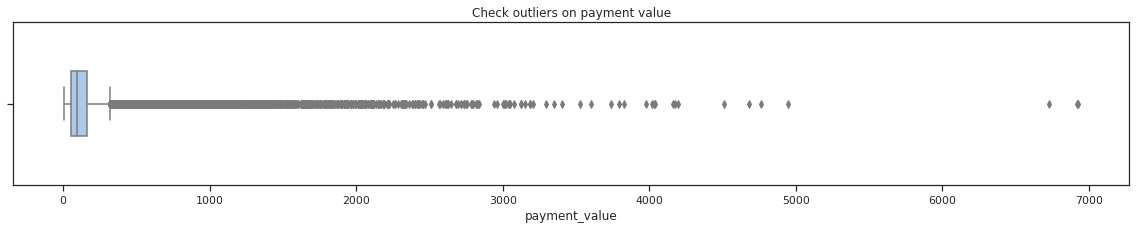

In [49]:
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(20, 3))
ax = sns.boxplot(x=merge_payment_order_item['payment_value_1'], width=0.4)
ax.set(title="Check outliers on payment value", xlabel="payment_value")
     

In [50]:
Q1 = merge_payment_order_item['payment_value_1'].quantile(0.25)
Q3 = merge_payment_order_item['payment_value_1'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print('upper limit =', upper_limit, '& lower limit =', lower_limit)

#check outliers
upper_outlier = merge_payment_order_item['payment_value_1'] > upper_limit
lower_outlier = merge_payment_order_item['payment_value_1'] < lower_limit
outliers = (upper_outlier | lower_outlier)
print('Total Outliers =', outliers.sum(), 'from', len(merge_payment_order_item), 'data')


upper limit = 321.565 & lower limit = -101.115
Total Outliers = 7287 from 98665 data


In [51]:
merge_product = merge_payment_order_item.merge(df_product, on='product_id', how='inner').merge(df_product_english_name, on='product_category_name', how='inner')
merge_product[['payment_value_1', 'product_category_name_english', 'order_item_id']].sort_values('payment_value_1', ascending=False)

,payment_value_1,product_category_name_english,order_item_id
19685,6929.31,housewares,1
96579,6922.21,computers,1
93130,6726.66,art,1
92690,4950.34,small appliances,1
92358,4764.34,small appliances,1
...,...,...,...
37028,9.59,health beauty,1
14379,9.56,perfumery,1
36116,9.09,health beauty,1
13644,7.28,perfumery,1


Olist e-commerce is from Brazil. so 1 brazillian real = 0.19 USD. Let's take a look at item number 2 above. if we someone spend 6922.21 brazillian real = 1292.52 USD. We don't consider upper_limit as outliers because it's very common for someone to valuable item like computers

we decide not to remove those outliers

In [52]:
final_df_merge = merge_payment_order_item.merge(df_order, on='order_id', how='inner').merge(df_review, on='order_id', how='left')
final_df_merge

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_item_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.9,13.29,1,0,1,0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.9,19.93,1,0,1,0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.0,17.87,1,0,1,0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,13.0,12.79,1,0,1,0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.9,18.14,1,0,1,0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95603,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,02/05/2018 04:11,300.0,43.41,1,1,0,0,...,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
95604,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,20/07/2018 04:31,350.0,36.53,1,1,0,0,...,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
95605,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,30/10/2017 17:14,99.9,16.95,1,0,1,0,...,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
95606,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,21/08/2017 00:04,56.0,8.72,1,0,1,0,...,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


**Exploratory Data Analysis**

In [53]:
final_df_merge.describe()

,price,freight_value,order_item_id,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher,payment_value_1,review_score
count,95608.000000,95608.00000,95608.0,95608.000000,95608.000000,95608.000000,95608.000000,95608.000000,94969.000000
mean,125.265046,20.14143,1.0,0.198780,0.773366,0.015145,0.057349,145.406476,4.153661
std,190.141504,15.78764,0.0,0.399085,0.425594,0.122217,0.411998,197.311876,1.286299
min,0.900000,0.00000,1.0,0.000000,0.000000,0.000000,0.000000,6.080000,1.000000
25%,41.000000,13.29000,1.0,0.000000,1.000000,0.000000,0.000000,57.280000,4.000000
50%,79.000000,16.34000,1.0,0.000000,1.000000,0.000000,0.000000,95.670000,5.000000
75%,139.900000,21.19000,1.0,0.000000,1.000000,0.000000,0.000000,162.550000,5.000000
max,6735.000000,409.68000,1.0,1.000000,2.000000,2.000000,25.000000,6929.310000,5.000000


**In this step, let's look at the following metrics:**
1. Count of Invoice and Customers
2. Monthly number of transactions
3. The peak order times
4. the products are delivered(in days)
5. What percentage of the type of payment are used ?

We choose the metrics since they would be more closely related to our end goal which is to group our customers into cohorts based on their first transactions.

Otherwise, it may also be interesting to see which stock codes have the most (bestsellers) and least (slow moving) transactions.

In [54]:
final_df_merge['customer_id'].nunique()

95081

In [55]:
final_df_merge['order_id'].nunique()

95081

We see that we have 95,081 unique transactions and 95,081 customers. This means that each invoice have each customer.

**Monthly number of transactions**

In [56]:
final_df_merge['order_purchase_timestamp'] = pd.to_datetime(final_df_merge['order_purchase_timestamp'], format ='%Y-%m-%d %H:%M:%S')
final_df_merge['order_approved_at'] = pd.to_datetime(final_df_merge['order_approved_at'], format ='%Y-%m-%d %H:%M:%S')
final_df_merge['order_delivered_carrier_date'] = pd.to_datetime(final_df_merge['order_delivered_carrier_date'], format ='%Y-%m-%d %H:%M:%S')
final_df_merge['order_delivered_customer_date'] = pd.to_datetime(final_df_merge['order_delivered_customer_date'], format ='%Y-%m-%d %H:%M:%S')
final_df_merge['order_estimated_delivery_date'] = pd.to_datetime(final_df_merge['order_estimated_delivery_date'], format ='%Y-%m-%d %H:%M:%S')
final_df_merge['review_creation_date'] = pd.to_datetime(final_df_merge['review_creation_date'], format ='%Y-%m-%d %H:%M:%S')

In [57]:
final_df_merge['invoice_month'] = final_df_merge['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [58]:
df_invoice_monthly = final_df_merge.groupby('invoice_month', as_index=False)['order_id'].count()
df_invoice_monthly

,invoice_month,order_id
0,2016-10,263
1,2016-12,1
2,2017-01,754
3,2017-02,1646
4,2017-03,2560
5,2017-04,2285
6,2017-05,3566
7,2017-06,3161
8,2017-07,3881
9,2017-08,4232


Text(0.5, -0.3, 'Month Date')

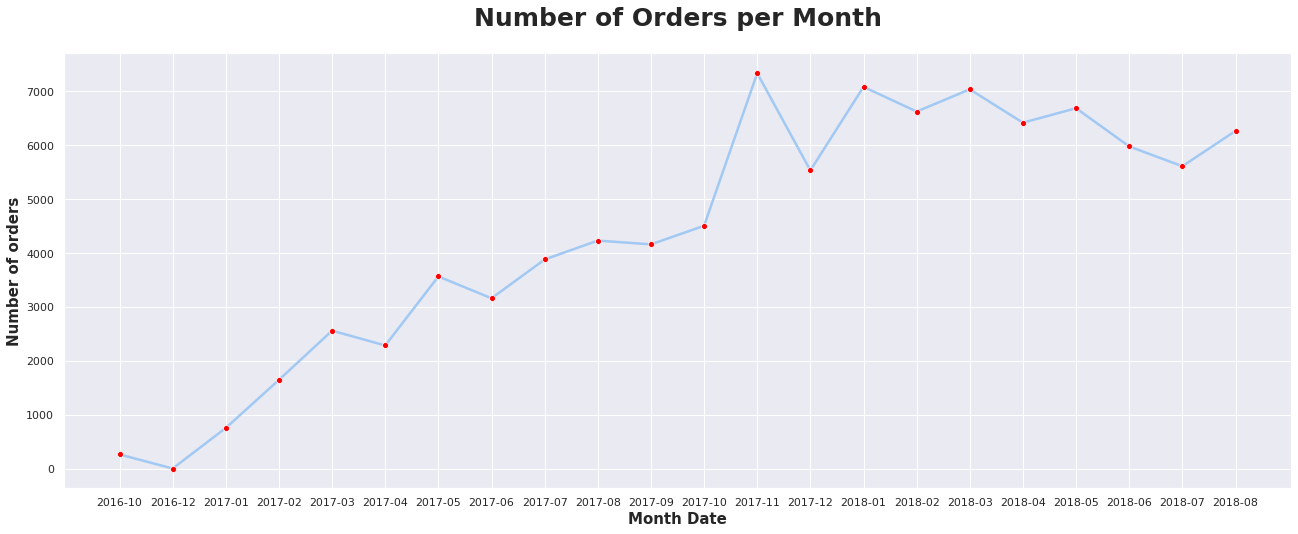

In [59]:
sns.set_theme(style='darkgrid', palette='pastel')
f, ax = plt.subplots(figsize=(22, 8))
sns.lineplot(x='invoice_month', y='order_id', data=df_invoice_monthly, linewidth=2.5,  marker='o', markerfacecolor='red')

ax.set_title("Number of Orders per Month", fontsize=25, fontweight='bold', position=(0.5,1.05))
ax.set_ylabel("Number of orders",fontsize=15, fontweight='bold', position=(-0.1,0.5))
ax.set_xlabel("Month Date",fontsize=15, fontweight='bold', position=(0.5,-0.3))


We see a couple of interesting findings here.
1. Since 2017-01, the number of orders gradually increased --> it shows positive trend 
2. The number of orders reached the highest point in 2017-11
3. The number of orders remained stable from 2018-01 to 2018-08 around 5000 - 6000 orders 



> **Recommendation**
1. Because there are high holiday seasons in November and December, make sure the website or application is optimized for mobile devices and desktop devices and can handle a high volume of traffic.
2. Engage the seller to use Offering free shipping or other incentives, such as a free gift with purchase. 







**The peak order times**

In [60]:
order_by_hour = final_df_merge.groupby(final_df_merge['order_purchase_timestamp'].dt.hour)['order_id'].nunique().reset_index()
order_by_hour

,order_purchase_timestamp,order_id
0,0,2294
1,1,1114
2,2,491
3,3,256
4,4,201
5,5,179
6,6,473
7,7,1182
8,8,2863
9,9,4560


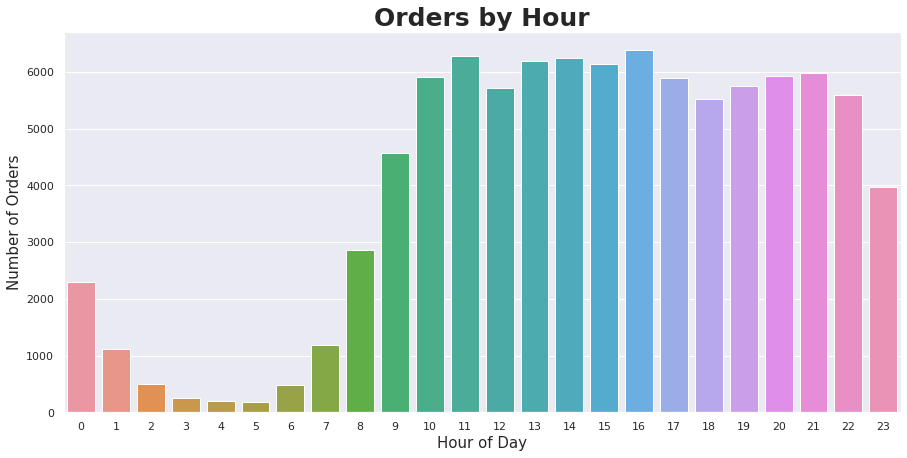

In [61]:
plt.figure(figsize = (15, 7))
sns.barplot(x = 'order_purchase_timestamp', y = 'order_id', data = order_by_hour)
plt.xlabel("Hour of Day", fontsize = 15)
plt.ylabel("Number of Orders", fontsize = 15)
plt.title("Orders by Hour", fontsize=25, fontweight='bold')
plt.show()

It shows that the peak hours for customers to purchase between 10AM and 10PM


> **Reccomendation**
1.  Follow up and engage the seller to use bid on keywords or promotional tools in order to have the products appear at the top of search results when customers search for those keywords.
2.   Increasing the price of bid on keywords from 10 AM - 10 pm





In [62]:
order_by_day = final_df_merge.groupby(final_df_merge['order_purchase_timestamp'].dt.day_name())['order_id'].nunique().reset_index().sort_values('order_id', ascending = False)
order_by_day

,order_purchase_timestamp,order_id
1,Monday,15486
5,Tuesday,15225
6,Wednesday,14841
4,Thursday,14186
0,Friday,13493
3,Sunday,11443
2,Saturday,10407


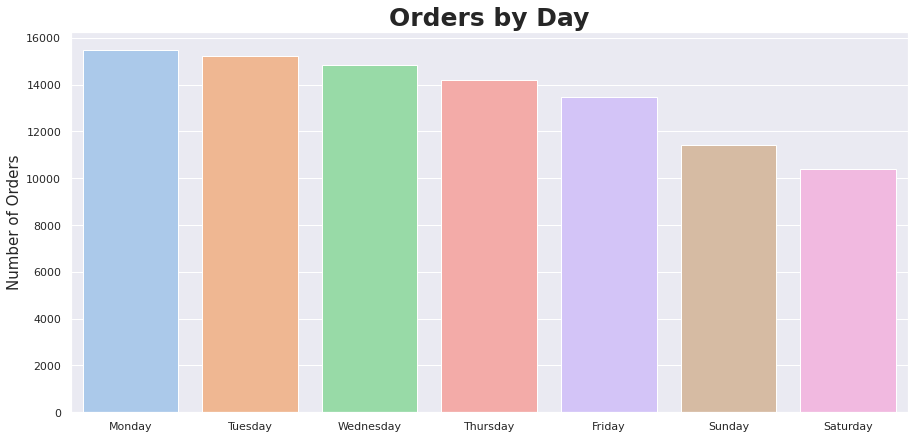

In [63]:
plt.figure(figsize = (15, 7))
sns.barplot(x = 'order_purchase_timestamp', y = 'order_id', data = order_by_day)
plt.xlabel("")
plt.ylabel("Number of Orders", fontsize = 15)
plt.title("Orders by Day", fontsize=25, fontweight='bold')
plt.show()

It shows that the peak orders is Monday. We can clearly see that Monday through Friday are the busy days.

> **Recommendation**
1. Make sure your website is optimized for mobile devices and can handle a high volume of traffic on the busy days
2. Engage the seller to use Black Friday Campaign in order to have customers purchase the products on Monday
3. For Black Friday or any busy days, use promotional tools to create limited-time deals or offer coupons to customers.





In [64]:
df_daily = final_df_merge.copy()

**The products are delivered(in days)**

In [65]:
df_daily['actual_delivery_day'] = (df_daily['order_delivered_customer_date'] - df_daily['order_approved_at']).dt.days
df_daily[['actual_delivery_day']].describe()

,actual_delivery_day
count,95608.000000
mean,11.732397
std,9.527472
min,0.000000
25%,6.000000
50%,9.000000
75%,15.000000
max,208.000000


[Text(0.5, 0, 'delivery time (in days)'),
 Text(0.5, 1.0, 'Check outliers on delivery time')]

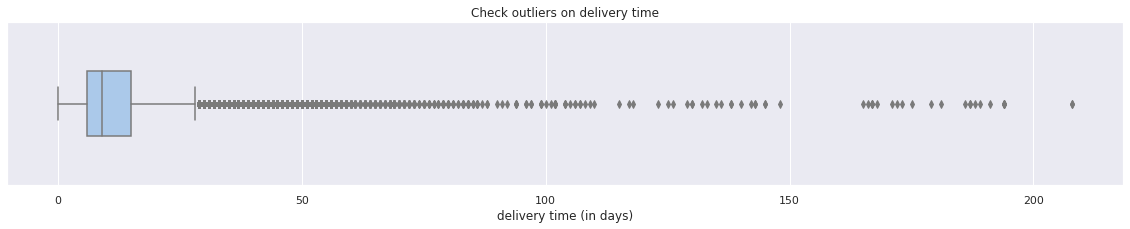

In [66]:
f, ax = plt.subplots(figsize=(20, 3))
ax = sns.boxplot(x=df_daily['actual_delivery_day'], width=0.4)
ax.set(title="Check outliers on delivery time", xlabel="delivery time (in days)")

the average of delivery time is 11.73 days and the median is 9 days. We noticed that there is an extreme outlier up tp 208 days.

**Does a longer delivery time affect poor review scores ?**

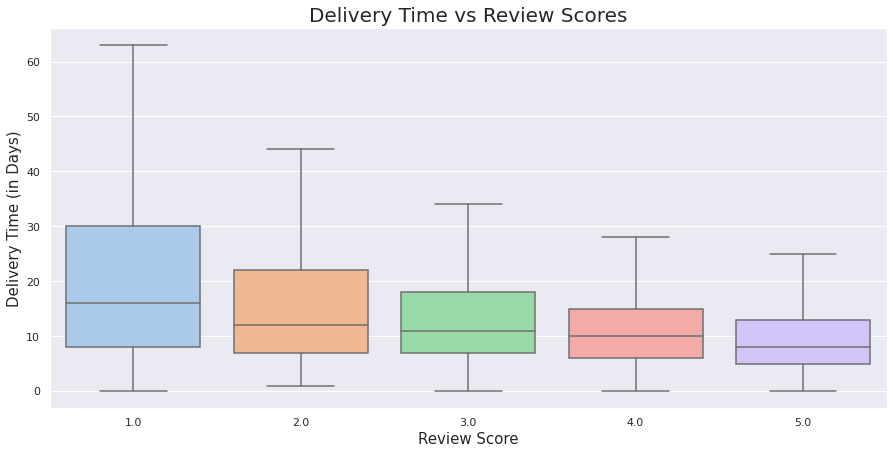

In [67]:
plt.figure(figsize = (15, 7))
sns.boxplot(x= 'review_score', y= 'actual_delivery_day', data = df_daily, showfliers = False)
plt.xlabel('Review Score', fontsize = 15)
plt.ylabel('Delivery Time (in Days)', fontsize = 15)
plt.title('Delivery Time vs Review Scores', fontsize = 20)
plt.show()

We can clearly see a direct relationship between delivery time and review score.The faster the delivery is, the higher score will be.
> **Recommendation**
1.   Use a shipping carrier with a strong delivery network help get the packages delivered more quickly
2.   Sellers must have three days limit to send the package to the shipping carrier. 
3. Try to choose a shipping carrier from a seller's location closer to the destination.

**The type of payments are used**

In [68]:
col_payment = ['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']
final_df_merge[col_payment].describe()

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
count,95608.000000,95608.000000,95608.000000,95608.000000
mean,0.198780,0.773366,0.015145,0.057349
std,0.399085,0.425594,0.122217,0.411998
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,1.000000,2.000000,2.000000,25.000000


In [69]:
final_df_merge[col_payment]

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
95603,1,0,0,0
95604,1,0,0,0
95605,0,1,0,0
95606,0,1,0,0


In [70]:
df_payment_type= final_df_merge[col_payment].sum()
df_payment_type= pd.DataFrame(df_payment_type).reset_index()
df_payment_type= df_payment_type.rename(columns={'index': 'payment_type', 0: 'count'})
df_payment_type['payment_type']= df_payment_type['payment_type'].str.replace("payment_type_", "")
df_payment_type['rate'] = round(100*df_payment_type['count']/df_payment_type['count'].sum(), 2)
df_payment_type

,payment_type,count,rate
0,boleto,19005,19.03
1,credit_card,73940,74.03
2,debit_card,1448,1.45
3,voucher,5483,5.49


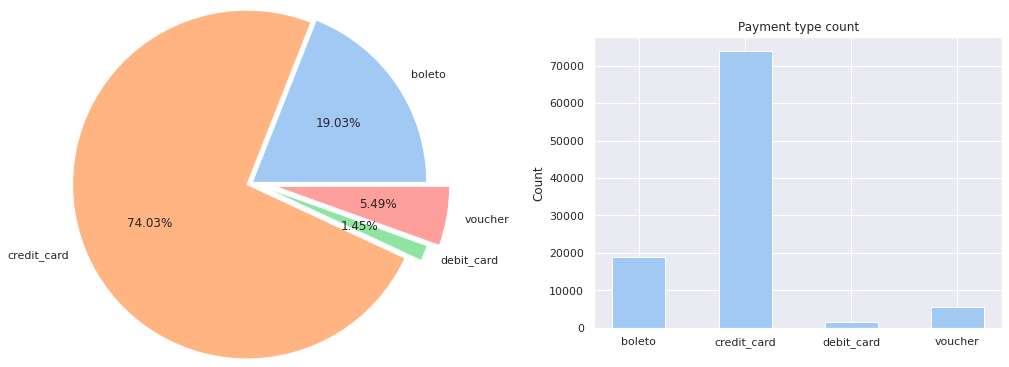

In [71]:
f, axs = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

axs[0].pie(data=df_payment_type, x='count', labels='payment_type', autopct='%1.2f%%', explode = (0, 0.05, 0.1, 0.2), radius=1.5)
axs[1].bar(df_payment_type['payment_type'], df_payment_type['count'], width=0.5)
axs[1].set(title="Payment type count", ylabel="Count")
plt.show()

From the chart above, it clearly shows that Credit cards are the most commonly used payment method (74.03%)

> **Recommendation**
1.   Use a credit card with rewards: Consider using a credit card that offers rewards for shopping on Olist e-commerce. This can help customers earn points, cash back
2.   Corporate with any provider Use a credit card with a low interest rate. So It can increase the credit-card users to shop on Olist-ecommerce



